# Aperture and blockage functions
The purpose of this notebook is to show all sub-functions necessary to compute the aperture distribution in a single dish radio telescope (or emitting antenna). These are the illumination, phase and telescope geometry (blockage).

In [1]:
# Adjustin notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# importing math and plot packages
import numpy as np
import matplotlib.pyplot as plt
from pyoof import telgeometry, aperture
plt.style.use('../pyoof/pyoof.mplstyle')  # it is in the pyoof directory

# Golden ratio
factor = 8
phi = 1.61803398875 * factor

### Blockage
The blockage or the telecope geometry is specific for every telescope. In general the structure it is given by a main dish and a sub-reflector dish. From the OOF study, it has been found that the structure plays an important role in the least squares fit procedure and it is suggested to make it as accurate as possible.

In [9]:
# Tha basic configuration
pr = 50  # Efffelsber primary reflector radius in meters
box_size = pr
x = np.linspace(-box_size, box_size, 1e3)
x_grid, y_grid = np.meshgrid(x, x)

# Let's look up at some of the basic parameters of a manual configuration
help(telgeometry.blockage_manual)

Help on function blockage_manual in module pyoof.telgeometry.telgeometry:

blockage_manual(pr, sr, a, L)
    Truncation for the aperture function, manual set up for the primary radius
    (pr), secondary radius (sr), hald thickness of a support leg (a) and
    length of the support leg (L) measured from the edge of the sr. It has been
    considered 4 support legs. To omit sr, a and L set them to zero.
    
    Parameters
    ----------
    pr : float
        Primary reflector radius.
    sr : float
        Seconday reflector radius.
    a : float
        Half thickness of a support leg.
    L : float
        Length of a support leg, measured from the edge of the sr to its end.
    
    Returns
    -------
    block : ndarray



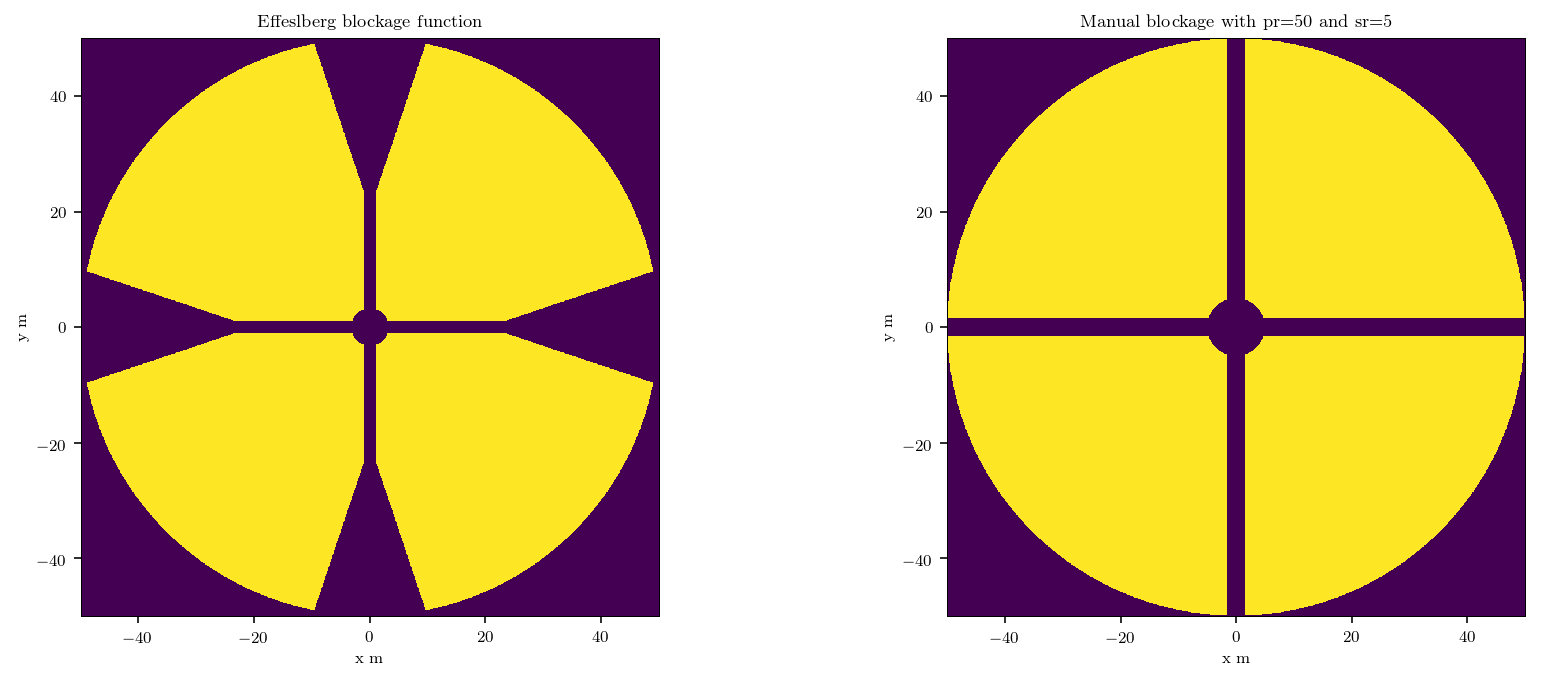

In [6]:
# Testing the blockage functions
_blockage_effelsberg = telgeometry.blockage_effelsberg(x=x_grid, y=y_grid)
_blockage_manual = telgeometry.blockage_manual(pr=pr, sr=5, a=1.5, L=50)(x=x_grid, y=y_grid)

extent = [-box_size, box_size, -box_size, box_size]

fig, ax = plt.subplots(ncols=2, figsize=(phi, factor))
fig.subplots_adjust(wspace=0.5)
    
ax[0].set_title('Effeslberg blockage function')
ax[0].imshow(_blockage_effelsberg, extent=extent, origin='lower')

ax[1].set_title('Manual blockage with pr=50 and sr=5')
ax[1].imshow(_blockage_manual, extent=extent, origin='lower')

for _ax in ax:
    _ax.set_xlabel('x m')
    _ax.set_ylabel('y m')
    _ax.grid('off')

# create an example blockage

### Illumination
The illumination function it is also a 2-dim grid, it is usually presented as a 1-dim function in books to compare between several types. There are several important parameters in an illumination functions, its offset $(x_0, y_0)$, amplitud, taper in dB and the order (may or may not have). 

In [86]:
# Calling the doc string from the pedestal illumination
help(aperture.illumination_pedestal)

Help on function illumination_pedestal in module pyoof.aperture.aperture:

illumination_pedestal(x, y, I_coeff, pr, order=2)
    Illumination function parabolic taper on a pedestal, sometimes called
    amplitude. Represents the distribution of light in the primary reflector.
    
    Parameters
    ----------
    x : ndarray
        Grid value for the x variable, same as the contour plot.
    y : ndarray
        Grid value for the x variable, same as the contour plot.
    I_coeff : ndarray
        List which contains 4 parameters, the illumination amplitude, the
        illumination taper and the two coordinate offset.
    pr : int
        Primary reflector radius.
    
    Returns
    -------
    illumination : ndarray



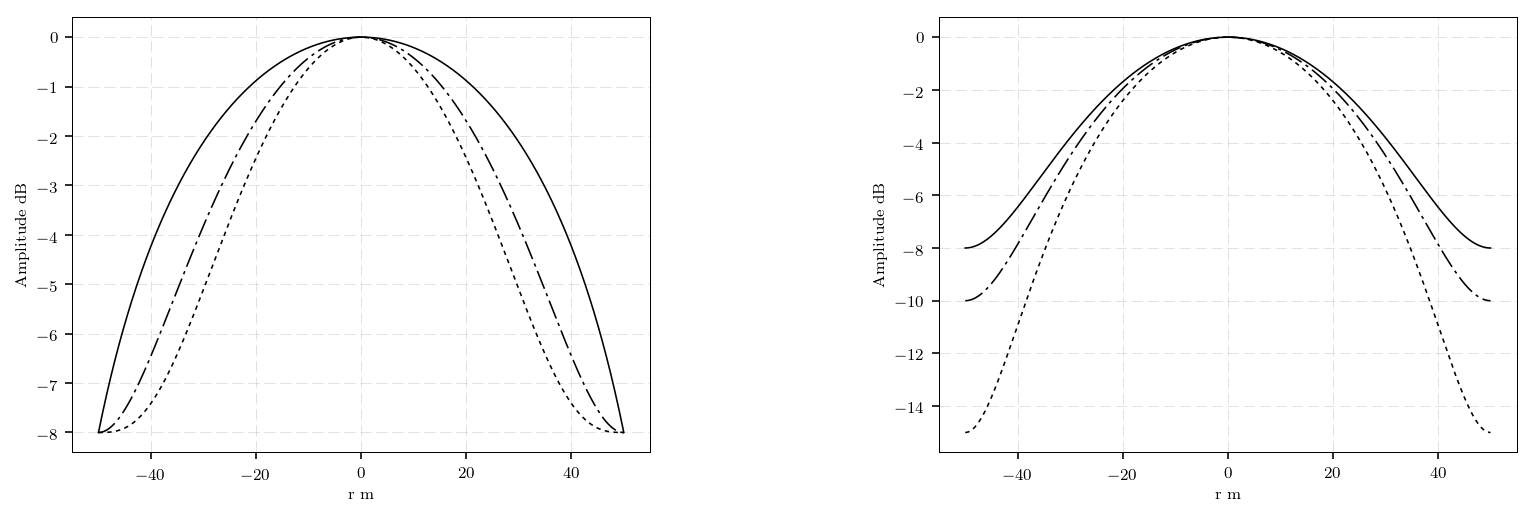

In [88]:
# importing the illumination functions
fig, ax = plt.subplots(ncols=2, figsize=(phi, factor/2))
fig.subplots_adjust(wspace=0.5)

for order, taper, linestyle in zip([1, 2, 3], [-8, -10, -15], ['-', '-.', ':']):
    _illum_order = aperture.illumination_pedestal(
        x=x, 
        y=0, 
        I_coeff=[1, -8, 0, 0],
        pr=pr,
        order=order
        )
    
    __illum_taper = aperture.illumination_pedestal(
        x=x,
        y=0,
        I_coeff=[1, taper, 0, 0],
        pr=pr,
        order=2
        )
    ax[0].plot(x, 20 * np.log10(_illum_order), linestyle=linestyle, c='k')
    ax[1].plot(x, 20 * np.log10(__illum_taper), linestyle=linestyle, c='k')

for _ax in ax:
    _ax.set_xlabel('r m')
    _ax.set_ylabel('Amplitude dB')
